In [110]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
from typing import Tuple

# Task 1: Probability
In this task I am going to solve robitcs probability tasks.

## Task 1.1: Plot probability density function
Let's plot the probability density function of a one dimensional Gaussian distribution $\mathcal{N}(x, 1, 1)$.

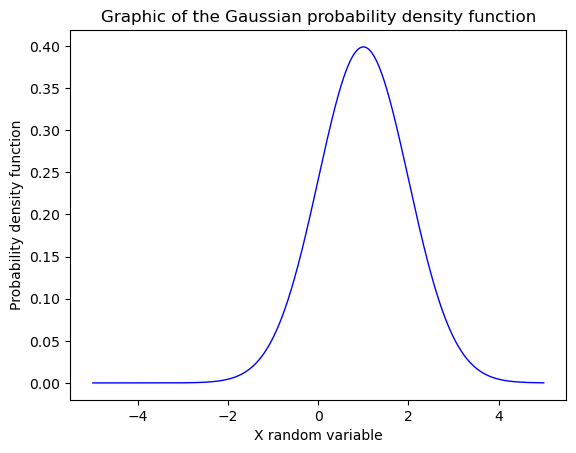

In [49]:
plt.figsize=(5,10)
x = np.linspace(-5, 5, 100001)
plt.plot(x, norm.pdf(x, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Probability density function')
plt.title('Graphic of the Gaussian probability density function')
plt.show()

## Task 1.2: Calculation of the probability mass
Lett's calculate the probability mass that random variable $X$ is less than 0 

First of all, let's plot the cumulative distribution function for the whole distribution.

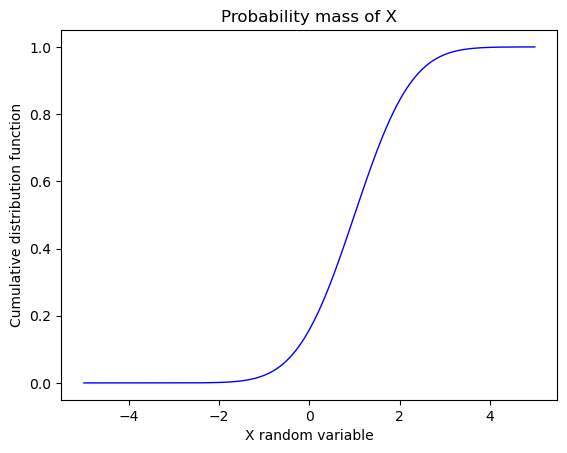

In [55]:
x_plot = np.linspace(-5, 5, 10000)
plt.figsize=(5,10)
plt.plot(x_plot, norm.cdf(x_plot, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Cumulative distribution function')
plt.title('Probability mass of X')
plt.show()

Next, plot the part of the function, where random variable X is lower than 0.

In [56]:
x_greater_zero = np.linspace(-5000, 0, 100000)
cdf = norm.cdf(x_greater_zero, 1, 1)

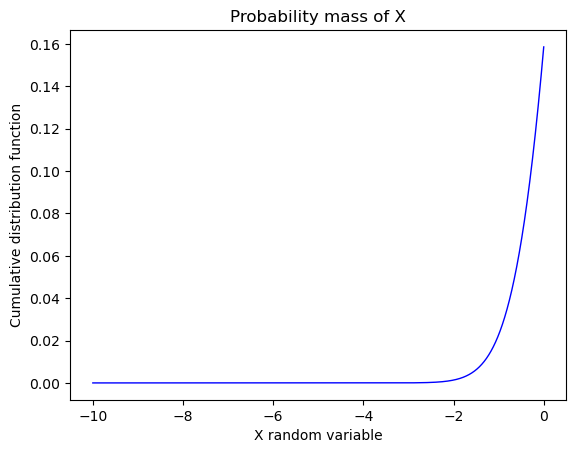

In [57]:
x_plot = np.linspace(-10, 0, 10000)
plt.figsize=(5,10)
plt.plot(x_plot, norm.cdf(x_plot, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Cumulative distribution function')
plt.title('Probability mass of X')
plt.show()

Finally, let's calculate the value of cdf. We cannot built cdf from $- \infty$ to 0, so, I chose the left boarder as -5000. I have checked with the left boarder equal to -5 and the value of cdf has difference less than $10^{-6}$.

In [61]:
print('CDF value of random variable X with Gaussian distribution with mean and variance equal to 1 is:     ', np.round(cdf[-1], 6))

CDF value of random variable X with Gaussian distribution with mean and variance equal to 1 is:      0.158655


So, the probability mass that $X \leq 0$ is equal to: $0.158655$.  

## Task 1.3: Bayes theorem
We have new observation variable z. It gives information about x by the likelihood function $p(z|x) = \mathcal{N}(z, x, \sigma^2)$, with variance $\sigma^2$ = 0.2. Let's derive and plot posterior distribution $p(x|z)$, given an observation z = 0.75. 

$p(x) = \mathcal{N}(x, 1, 1)$ <br>
$p(z|x) = \mathcal{N}(z, x, \sigma^2)$ <br>
Using Bayes' theorem we will have: $p(x|z) = \eta * p(z|x) p(x)$, where $\eta$ - is normalization coefficient.
$p(x|z) = \eta\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x - 1)^2}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\frac{(z - x)^2}{\sigma^2}} = \eta\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x - 1)^2}\frac{1}{\sqrt{2\pi0.2^2}}e^{-\frac{1}{2}\frac{(0.75 - x)^2}{0.2^2}}= \eta\frac{1}{2\pi}\frac{1}{\sqrt{0.2}}e^{-\frac{1}{2}\left[(x-1)^2 + \frac{(x-0.75)^2}{0.2}\right]}$ <br>
$\beta = \frac{0.2x^2 - 2 * 0.2 + 0.2 + x^2 - 2 * 0.75 + 0.75^2}{2 * 0.2} = \frac{(0.2 + 1)x^2 - 2(0.2 + 0.75)x + (0.2 + 0.75^2)}{2 * 0.2} = \frac{x^2 - 2\frac{0.2 + 0.75}{0.2 + 1} + \frac{0.2 + 0.75^2}{0.2 + 1}}{2\frac{0.2}{0.2 + 1}} = \frac{x^2 -2\frac{0.2 + 0.75}{0.2 + 1}x + \frac{0.2 + 0.75^2}{0.2 + 1}}{2\frac{0.2}{0.2 + 1}} = \frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{2\frac{0.2}{0.2 + 1}} + \frac{\frac{0.2 + 0.75^2}{0.2 + 1} - (\frac{0.2 + 0.75}{0.2 + 1})^2}{2\frac{0.2}{0.2 + 1}}  = \frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{2\frac{0.2}{0.2 + 1}} + \frac{(1 - 0.75)^2}{2(0.2 +1)}\Rightarrow$ <br>
$p(x|z) = \eta \frac{1}{2\pi\sqrt{0.2}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}$ <br>
Now, we have thing which is similar to gaussian. So, we have: <br>
$\mu_{x|z} = \frac{0.2 + 0.75}{0.2 + 1}$, $\sigma^2 = \frac{0.2}{0.2 + 1}$
So, the distribution of $p(x|z)$ will be: <br>
$p(x|z) = \frac{1}{\sqrt{2\pi\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}$ <br>
Let's calculate the normalization factor: <br>
$p(x|z) = \eta \frac{1}{2\pi\sqrt{0.2}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}= \eta\frac{1}{\sqrt{2\pi\frac{0.2}{0.2 + 1}}}\frac{1}{\sqrt{2\pi(0.2 + 1)}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}$, so the $\eta$ is equal: <br>
$\eta = \sqrt{2\pi(0.2 + 1)}e^{\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}$ <br>

Now, let's plot $p(x|z)$

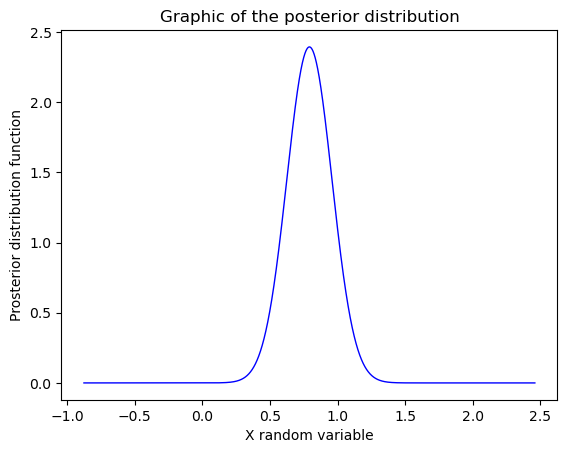

In [189]:
mean = (0.2 + 0.75) / (0.2 + 1)
std = 0.2 / (0.2 + 1)
plt.figsize=(5,10)
x = np.linspace(mean - 10 * std, mean + 10 * std, 100001)
plt.plot(x, norm.pdf(x, mean, std),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Prosterior distribution function')
plt.title('Graphic of the posterior distribution')
plt.show()

Check the distribution with cumulative function

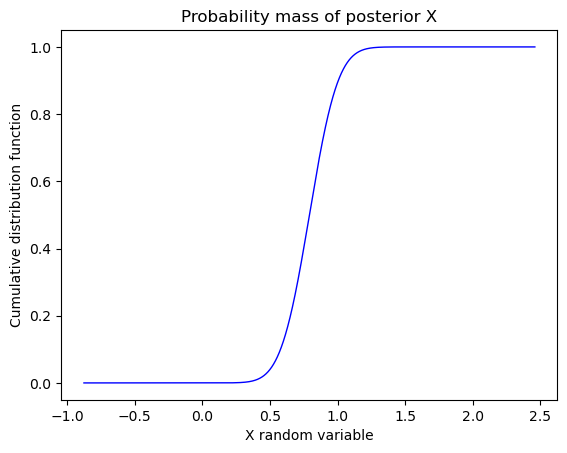

In [197]:
mean = (0.2 + 0.75) / (0.2 + 1)
std = 0.2 / (0.2 + 1)
plt.figsize=(5,10)
x = np.linspace(mean - 10 * std, mean + 10 * std, 100001)
plt.plot(x, norm.cdf(x, mean, std),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Cumulative distribution function')
plt.title('Probability mass of posterior X')
plt.show()

Again plot $p(x)$:

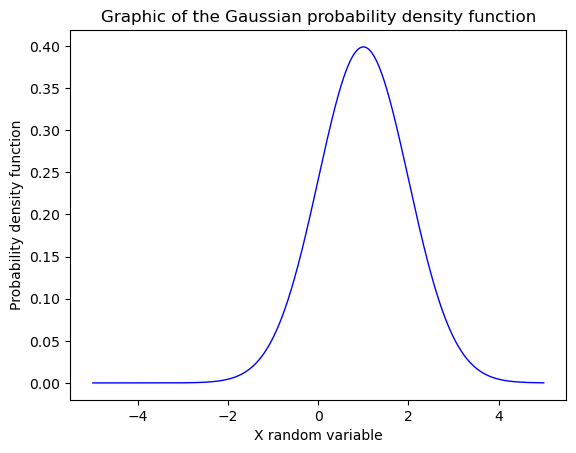

In [190]:
plt.figsize=(5,10)
x = np.linspace(-5, 5, 100001)
plt.plot(x, norm.pdf(x, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Probability density function')
plt.title('Graphic of the Gaussian probability density function')
plt.show()

And finally, plot both graphics on the one canvas

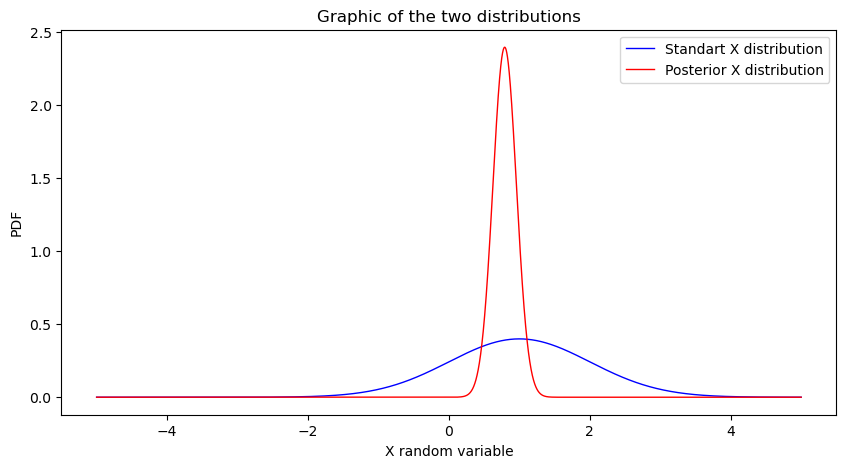

In [196]:
mean = (0.2 + 0.75) / (0.2 + 1)
std = 0.2 / (0.2 + 1)
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(-5, 5, 100001)
plt.plot(x, norm.pdf(x, 1, 1),
        'b-', lw=1, alpha=1, label='Standart X distribution')
plt.plot(x, norm.pdf(x, mean, std),
        'r-', lw=1, alpha=1, label='Posterior X distribution')
ax.legend();
plt.xlabel('X random variable')
plt.ylabel('PDF')
plt.title('Graphic of the two distributions')
plt.show()

# Task 2: Multivariate gaussian
## Task 2.1: Visualization of multivariation gaussian distribution
Let's build plot2dcov function, which will plot visualization of 2-d gaussian with three main parameters: mean, covariance and iso-contour value k.

In [169]:
def upper_circle(x: np.float64, k: np.int64) -> np.float64:
    return np.sqrt(k**2 - (x)**2)

def lower_circle(x: np.float64, k: np.int64) -> np.float64:
    return -np.sqrt(k**2 - (x)**2)

def generate_points(k: np.int64, number_of_points: np.int64) -> Tuple[np.array, np.array]:
    x = np.linspace(-k, k, number_of_points // 2)
    upper_y = np.array([upper_circle(x_i, k) for x_i in x])
    lower_y = np.array([lower_circle(x_i, k) for x_i in x])
    tmp = np.array([x, upper_y])
    return np.array([x, upper_y]), np.array([x, lower_y])

def transform(mean: np.array, cov: np.array, upper: np.array, lower:np.array) -> Tuple[np.array, np.array]:
    center_x = mean[0]
    center_y = mean[1]
    L = scipy.linalg.cholesky(cov).T
    upper_transform = L @ upper
    lower_transform = L @ lower
    upper_transform[0,:] = upper_transform[0,:] + center_x
    upper_transform[1,:] = upper_transform[1,:] + center_y
    lower_transform[0,:] = lower_transform[0,:] + center_x
    lower_transform[1,:] = lower_transform[1,:] + center_y
    return upper_transform, lower_transform


def plot2dcov(mean: np.array, cov: np.array, k: np.int64, number_of_points: np.int64, color: str = 'blue', type='point'):
    upper, lower = generate_points(k, number_of_points)
    upper, lower = transform(mean, cov, upper, lower)
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect('equal')
    if type == 'point':
        plt.scatter(upper[0,:], upper[1, :], color=color)
        plt.scatter(lower[0, :], lower[1, :], color=color)
    else:
        plt.plot(upper[0,:], upper[1, :], color=color)
        plt.plot(lower[0, :], lower[1, :], color=color)
    plt.show

<Figure size 1000x1000 with 0 Axes>

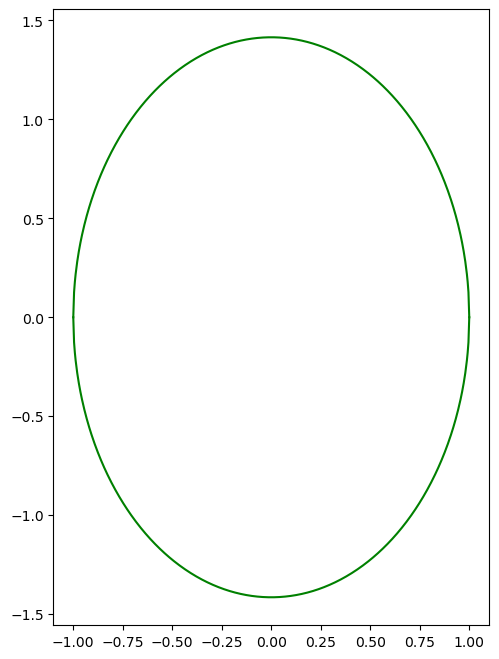

In [173]:
cov = np.array([[1, 0], [0, 2]])
mean = np.array([0, 0])
plot2dcov(mean, cov, 1, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

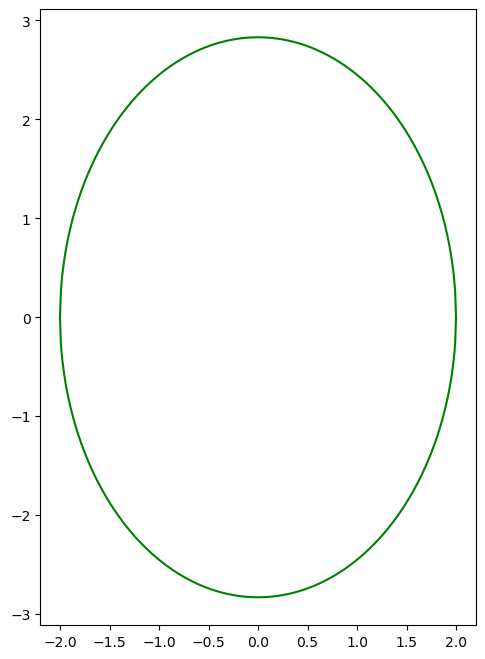

In [174]:
cov = np.array([[1, 0], [0, 2]])
mean = np.array([0, 0])
plot2dcov(mean, cov, 2, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

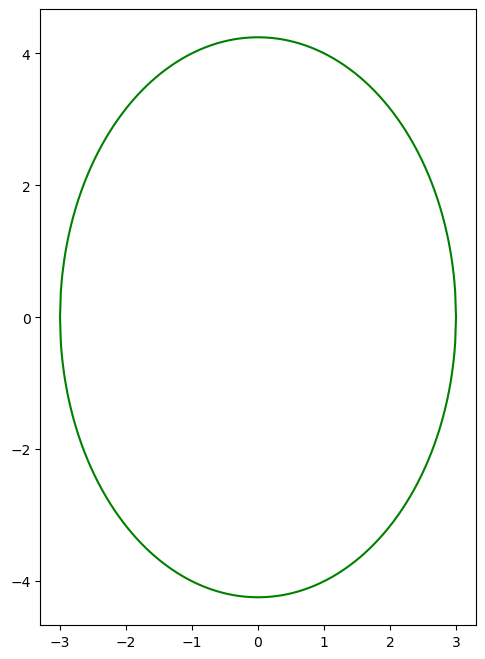

In [175]:
cov = np.array([[1, 0], [0, 2]])
mean = np.array([0, 0])
plot2dcov(mean, cov, 3, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

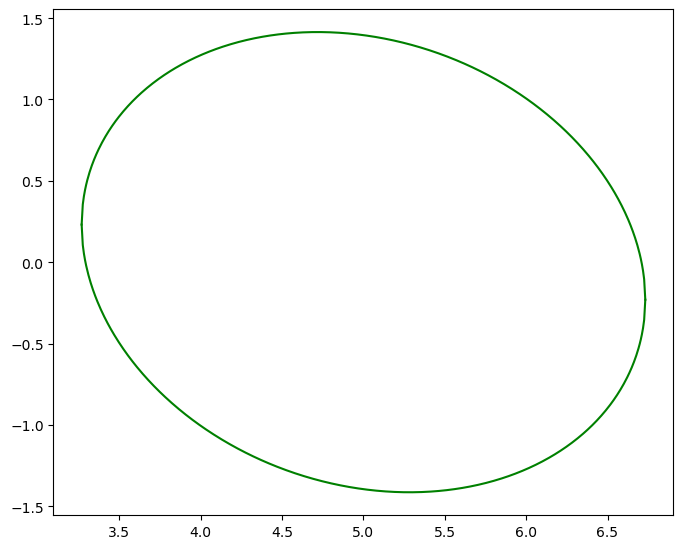

In [184]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mean = np.array([5, 0])
plot2dcov(mean, cov, 1, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

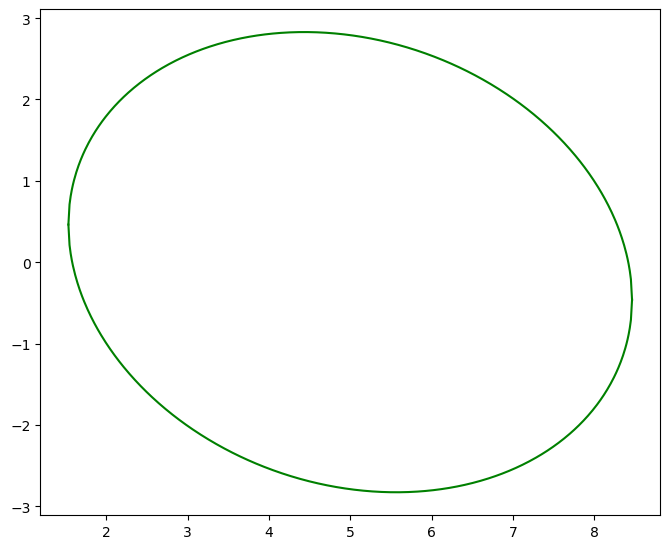

In [185]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mean = np.array([5, 0])
plot2dcov(mean, cov, 2, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

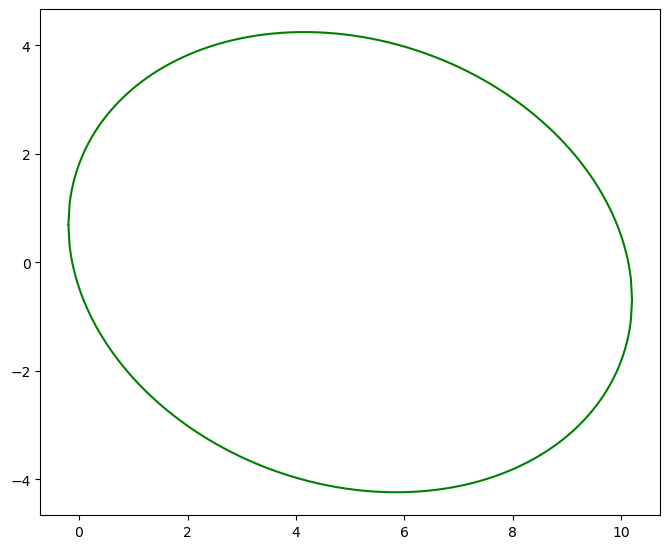

In [186]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mean = np.array([5, 0])
plot2dcov(mean, cov, 3, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

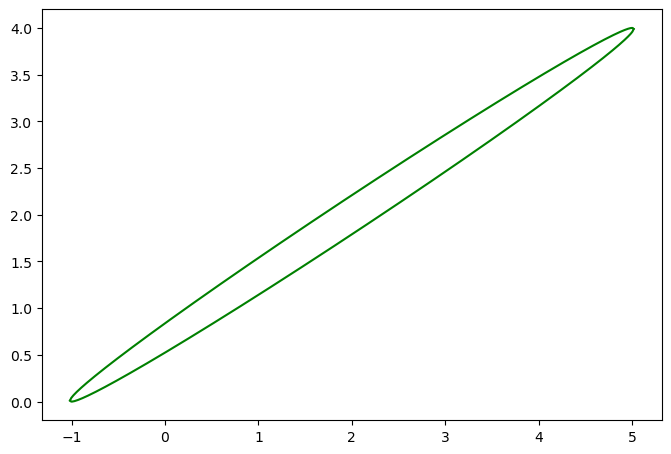

In [183]:
cov = np.array([[9.1, 6], [6, 4]])
mean = np.array([2, 2])
plot2dcov(mean, cov, 1, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

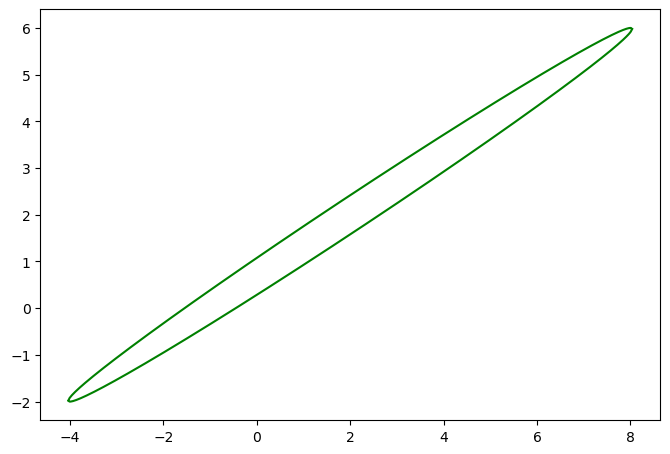

In [180]:
cov = np.array([[9.1, 6], [6, 4]])
mean = np.array([2, 2])
plot2dcov(mean, cov, 2, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

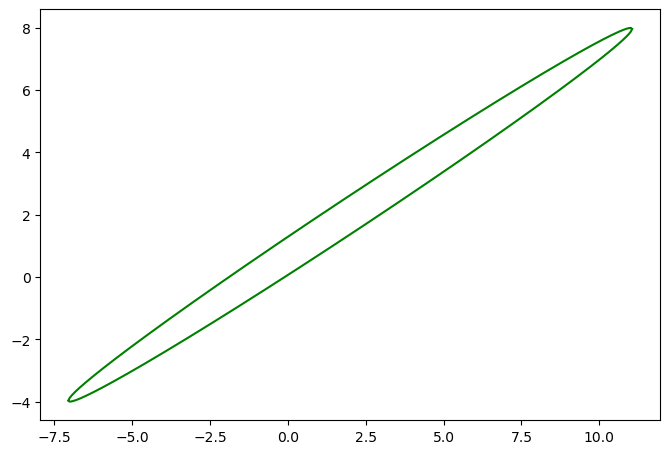

In [181]:
cov = np.array([[9.1, 6], [6, 4]])
mean = np.array([2, 2])
plot2dcov(mean, cov, 3, 1000, color='green', type='line')